In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log, dot, e
# sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

##### For Building the Model #####
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import warnings  # To import for useless number for k
from matplotlib import style
from collections import Counter
import random
import pandas as pd

style.use("fivethirtyeight")

The dataset may be downloaded from https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

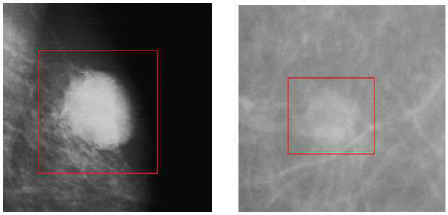

Fot the sklearn implementation: Credits to https://www.jcchouinard.com/k-nearest-neighbors/

<h2>Loading and Preprocessing the Data</h2>

In [19]:
### Load the data
df = pd.read_csv("data.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (569, 32)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h3>Dropping unnecessary columns</h3>

In [20]:
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [21]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


<h3>Data Standardization</h3>

In [23]:
x_min = np.min(x_data, axis=0)
x_max = np.max(x_data, axis=0) 
X = (x_data - x_min)/(x_max- x_min).values
# X.insert(0, 'bias', [1]*len(X))
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
842517,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
84300903,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
84348301,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
84358402,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
926682,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
926954,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909


<h3>Splitting the Dataset</h3>

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (426, 30)
y_train size: (426,)

x_test size: (143, 30)
y_test size: (143,)


<h1> KNN from Scratch</h1>

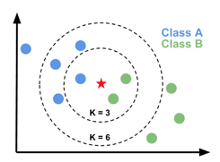

Screen Shot 2022-11-06 at 10.23.28 AM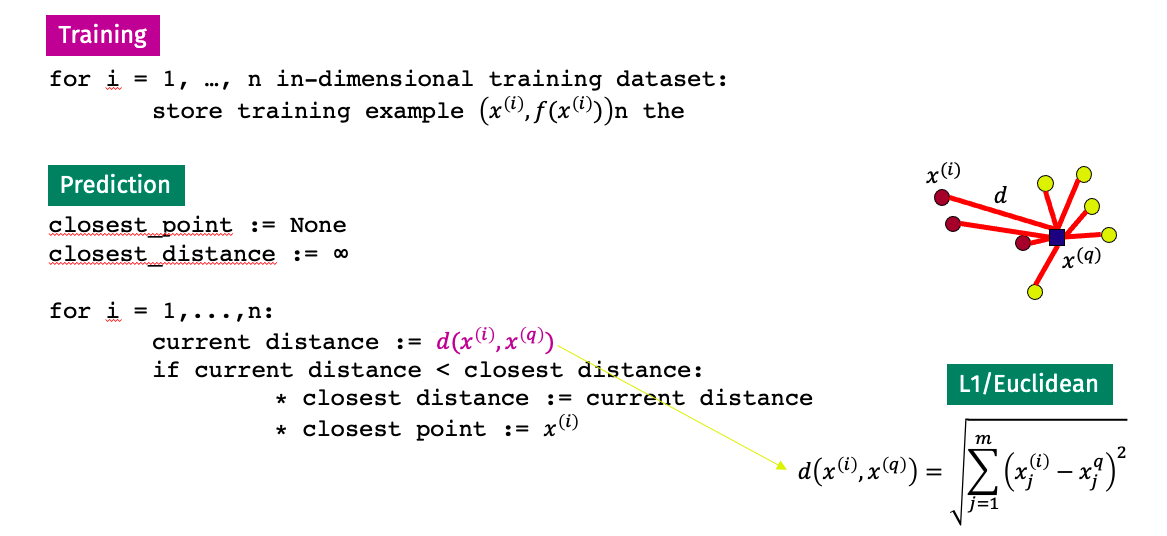

Screen Shot 2022-11-06 at 10.26.35 AM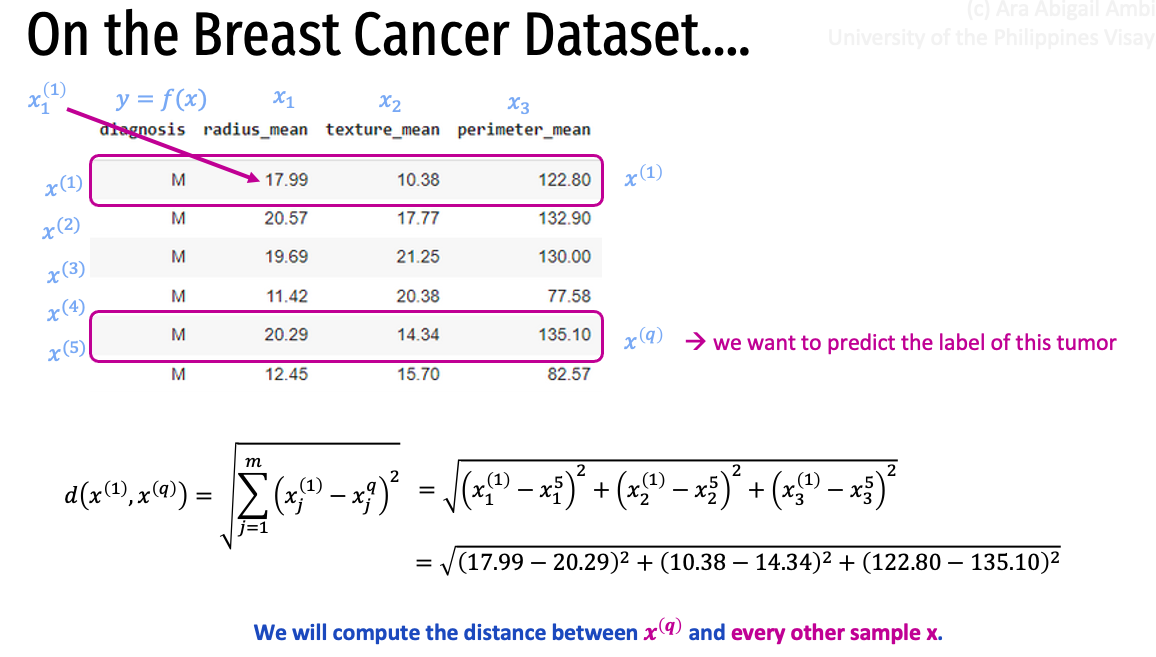

Screen Shot 2022-11-06 at 10.25.14 AM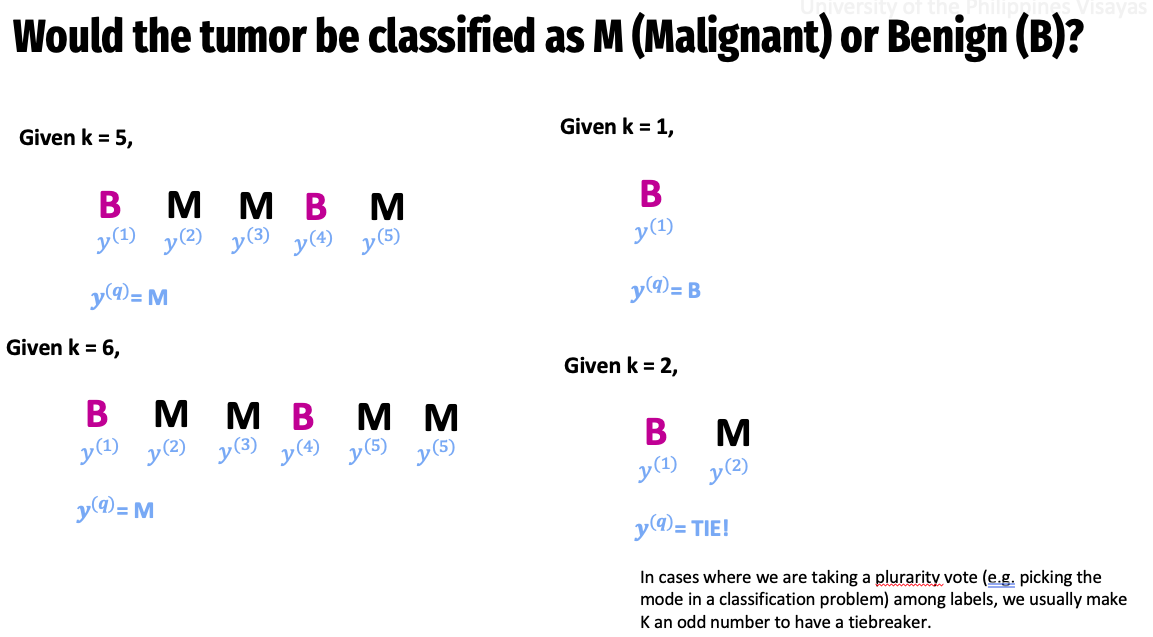

In [25]:
def euclidean(a, b):
    return np.sqrt(np.sum((a-b)**2, axis = 1))

def manhattan(a, b):
    return np.sum(np.abs(a-b), axis = 1)

# def euclidean(a,b):
#     return np.linalg.norm(a-b, axis = 1)

In [135]:
def knn(train, y_train, test, k = 3):
    distances = euclidean(train,test) #compute distance
    indices = np.argsort(distances) #identify indices of sorted distances
    votes = y_train[indices[:k]] #identify label of closest points
    unique, counts = np.unique(votes, return_counts=True)
    predicted = unique[np.argmax(counts)]
    return predicted

In [39]:
x_train = np.array(x_train)
x_test = np.array(x_test)

<h3>Predicting only one sample of the test set </h3>

In [136]:
knn(x_train, y_train, x_test[0:1], k = 3)

0

<h3> Predicting all samples of the test set </h3>

In [131]:
predicted = []
for sample in x_test:
    y = knn(x_train, y_train, sample, k = 3)
    print(y)
    predicted.append(y)

[ 37 311  87] [0 0 0]
0
[195 121 371] [1 1 1]
1
[160 156 322] [1 1 1]
1
[228 357  22] [0 0 0]
0
[293  22 155] [0 0 0]
0
[191  12 389] [1 1 1]
1
[179  83 320] [1 1 1]
1
[ 40 163  41] [1 1 1]
1
[303 127 362] [1 0 1]
1
[386  28  60] [0 0 0]
0
[415 327 122] [0 0 0]
0
[ 40 346 244] [1 1 1]
1
[100 212  57] [0 0 0]
0
[204 241 211] [1 1 0]
1
[378 395 237] [0 0 0]
0
[379 370 196] [1 1 1]
1
[201 137  15] [0 0 0]
0
[284  68 153] [0 0 0]
0
[321 158 123] [0 0 0]
0
[157 413 320] [1 1 1]
1
[127 107 374] [0 0 1]
0
[272 169 153] [0 0 0]
0
[320 389 192] [1 1 1]
1
[343 110  64] [0 0 0]
0
[ 51  84 213] [0 0 0]
0
[330 199 113] [0 0 0]
0
[395 125 261] [0 0 0]
0
[215 250 245] [0 0 0]
0
[ 10 141  35] [0 0 0]
0
[265 375 324] [1 1 1]
1
[140 377 166] [0 0 0]
0
[214 364 185] [0 0 0]
0
[199 387 284] [0 0 0]
0
[ 15 185 200] [0 0 0]
0
[284 153 296] [0 0 0]
0
[350 342 147] [0 0 0]
0
[ 33 105  24] [1 1 0]
1
[350  75 342] [0 0 0]
0
[230 156 289] [1 1 1]
1
[ 32 213  24] [0 0 0]
0
[284 153 140] [0 0 0]
0
[412 220 160] [1

<h3>Evaluating the predictions</h3>

In [132]:
print(accuracy_score(predicted,y_test))
print(precision_recall_fscore_support(predicted,y_test,average="macro"))

0.972027972027972
(0.9702455264253016, 0.9702455264253016, 0.9702455264253016, None)


<h1>SKLEARN Implementation</h1>

In [133]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [134]:
print(accuracy_score(y_pred,y_test))

0.972027972027972


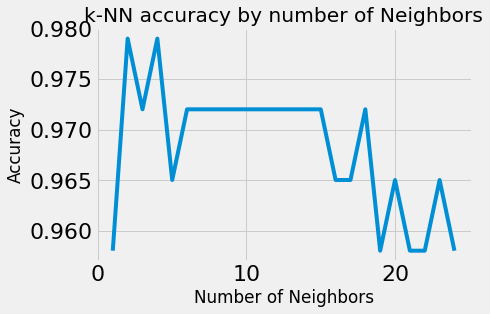

In [15]:
neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy[i] = knn.score(x_test, y_test)
 
plt.title('k-NN accuracy by number of Neighbors')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

[[87  2]
 [ 2 52]]


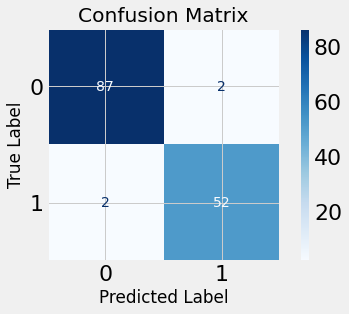

In [16]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
 
color = 'black'
matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,  cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [17]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

